In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
img_generator = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

In [ ]:
ROOT_DIR = "C:/Users/rishi/Downloads/LP-IV-datasets/LP-IV-datasets/Object Detection(Ass6)/caltech-101-img"

train_data = img_generator.flow_from_directory(
  directory=ROOT_DIR,
  target_size=(224,224),
  batch_size=32,
  shuffle=True,
  subset='training'
)

validation_data = img_generator.flow_from_directory(
  directory=ROOT_DIR,
  target_size=(224,224),
  batch_size=32,
  shuffle=True,
  subset='validation'
)

Found 7356 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


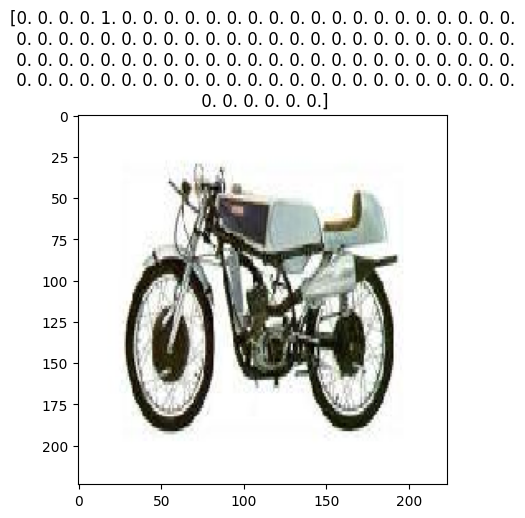

In [6]:
imgs,labels = next(train_data)
for img,label in zip(imgs,labels):
    plt.imshow(img)
    plt.title(label)
    plt.show()
    break

In [7]:
from tensorflow.keras.applications import VGG16

In [8]:
WEIGHT_PATH = "C:/Users/rishi/Downloads/LP-IV-datasets/LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [10]:
base_model = VGG16(
  weights=WEIGHT_PATH,
  include_top=False,
  input_shape=(224,224,3)
)

In [11]:
base_model.trainable = False

In [13]:
model = tf.keras.models.Sequential([
  base_model,
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(102,activation='relu'),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 102)            │       470,118 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,184,806 (57.93 MB)

 Trainable params: 470,118 (1.79 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [20]:
model.fit(train_data,validation_data=validation_data,batch_size=1000,epochs=10)

Epoch 1/10
 11/230 ━━━━━━━━━━━━━━━━━━━━ 13:14 4s/step - categorical_accuracy: 0.0276 - loss: nan

KeyboardInterrupt: 